In [ ]:
#Import
import sys

from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from pandas.io.json import json_normalize

from keras.datasets import imdb
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers
from keras import losses
from keras import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import text 

from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import Activation
from keras.layers import Conv1D
from keras import regularizers
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout
import nltk
from nltk.corpus import stopwords




In [ ]:
data = []
print("Reading in file")
#json_list = ['reviews_Movies_and_TV_5.json','reviews_Amazon_Instant_Video_5.json']
json_list = ['reviews_Movies_and_TV_5.json'] #Used for big data
#json_list = ['reviews_Amazon_Instant_Video_5.json'] # USed for fast testing
counter = 0
for file in json_list:
    counter+=1
    print("On file " + str(counter) + " out of " + str(len(json_list)))
    with open('/Volumes/TOSHIBA/desktop/data_sets/'+ file) as f:
        for line in f:
            data.append(json.loads(line))
            
limit = 500000
print("Shuffle the order, limiting entries to " + str(limit))
shuffle(data)

print("Making df")
df = pd.DataFrame.from_dict(json_normalize(data[:limit]), orient='columns')

    #print(df)
    #df = df.values.tolist()
     
header = df.columns.tolist()
    
print("removing non letters")
# Remove unneeded special characters by encoding to ascii and then recoding to utf-8
df.reviewText = df.reviewText.str.encode('ascii', 'ignore')
df.reviewText = df.reviewText.str.decode('utf-8')
print("removing stop words")
stop_words = set(stopwords.words('english'))
# Removing stopwords - you need a list called stopwords defining your stopwords
df.reviewText = df.reviewText.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    
    
df=df.values
data = list(df)
x_train = []
y_train = []
y_train_helpful = []
print("Binning y")
#print(header)
help_count = 0
for i in range(0,(len(data))):
    #print(data[i])
    #input("Press enter to continue")  

    x_train.append(data[i][3])
    if data[i][2] <=3:
        y_train.append(0)
    else:
        y_train.append(1)

print("Finished with data")

In [ ]:
#Testing

max_length = 250
top_x_words = 1000
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# create the tokenizer
#return each list with a max number of words in a line
print('Setting max number of words to take')
t = Tokenizer(num_words=top_x_words)
# fit the tokenizer on the documents
print('Finding words in the data, applying hash')
t.fit_on_texts(x_train)
# summarize what was learned
#print(t.word_counts)
#print(t.document_count)
#print(t.word_index)
#print(t.word_docs)
# integer encode documents
print("Turning the data into encoded data")
encoded_x_train = t.texts_to_matrix(x_train, mode='count')

print("Setting a max lenth to data, and padding post for short sequence")
encoded_x_train = pad_sequences(encoded_x_train, maxlen=max_length, padding='post')


In [ ]:
    print("Splitting data")
    x_train, x_test, y_train, y_test = train_test_split(encoded_x_train, y_train, random_state=69, shuffle=True, test_size=0.20)
    y_train = np.asarray(y_train).astype('float32')
    y_test = np.asarray(y_test).astype('float32')
    print("Done splitting data")

In [ ]:
   
epochs = 10
batch_size = 256

print("Running NN")

temp =len(list(x_train))

    
model = models.Sequential()
model.add(Dense(64, activation='relu',input_shape= (np.array(x_train).shape[1],)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train,y_train, epochs=epochs,validation_data=((x_test),(y_test)), batch_size=batch_size)
    

In [ ]:

    
    history_dict = history.history
    
    loss_values = history_dict['loss']
    epochs = range(1, len(loss_values) + 1)
    
    loss_values = np.array(loss_values)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)
    
    
    acc_values = history_dict['acc']
    acc_values = np.array(acc_values)
    val_acc_values = history_dict['val_acc']
    val_acc_values = np.array(val_acc_values)
  
    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, label='Training loss')
    plt.plot(epochs, val_loss_values, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



In [ ]:

epochs = 5
batch_size = 256
model.fit(np.array(x_train),np.array(y_train), epochs=epochs, batch_size=batch_size)

loss,accuracy = model.evaluate(x_test,y_test)

print("Deep NN")
print("loss: "+ str(loss))
print("accuracy: "+ str(accuracy))


In [ ]:
print(len(x_train))
accuracys = []
accuracys.append(accuracy)

value = sum(y_test)
positive = value/len(y_test)
negative = 1 - positive
print("Percent positive reviews: " + str(positive))
print("Percent Negative reviews: " + str(negative))
print("Finished with data")

size = len(y_test)

listofzeros = [0] * size
accuracy = accuracy_score(y_test, listofzeros)
accuracys.append(accuracy)
del listofzeros


listofones = [1] * size
accuracy = accuracy_score(y_test, listofones)
accuracys.append(accuracy)
del listofones



In [ ]:
    print("Running XGBoost")
    model = GradientBoostingClassifier(n_estimators=100,verbose=1)
    model.fit(x_train, y_train)
    results2 = model.predict(x_test)
    accuracy = accuracy_score(y_test, results2)
    accuracys.append(accuracy)

    print("GBC")
    print("accuracy " + str(accuracy))


In [ ]:
    print("Running LR")
    lrmodel =LogisticRegression()
    fitmodel =lrmodel.fit(x_train, y_train)
    results = fitmodel.predict(x_test)

    #print(y_test) 
    accuracy = accuracy_score(y_test, results)
    accuracys.append(accuracy)
    print("LR")
    print("accuracy " + str(accuracy))


In [ ]:
  
    clf = MultinomialNB()
    clf = clf.fit(x_train, y_train)
    results2= (clf.predict(x_test))
    accuracy = accuracy_score(y_test, results2)
    accuracys.append(accuracy)
    print("Multinomial BB")
    print( "Accuracy " + str( accuracy))

In [ ]:
    value = sum(y_test)
    positive = value/len(y_test)
    negative = 1 - positive
    print("Percent positive reviews: " + str(positive))
    print("Percent Negative reviews: " + str(negative))
    print("Finished with data")
    


    names = ["Keras","all neg", "all pos","XGBoost","LR", "NB"]
   
   
    
    y_len = np.arange(len(accuracys))
    fig, ax = plt.subplots()

    chart= plt.bar(y_len, accuracys, align='center')#, alpha=0.5)
    plt.xticks(y_len, names)
    plt.ylim(0.0, 1.0)
    plt.ylabel('Accuracy')
    plt.title('Difference in Accuracy')
    plt.legend(names)

    i=0
    for bar in chart:
        height = bar.get_height()
        #print(height)
        ax.text(bar.get_x() + bar.get_width()/2., height,'%d' % int(height*100) + "%", ha='center', va='bottom')

        i+=1
    plt.tight_layout()
    plt.show()

In [ ]:
'''
All the models beat guessing. However, marking every review as negative 
you almost get the same accuracy as all the models. As noted, XGBoosts time also blew up.
Again, LR seems to do very well, and not take that long.
'''

In [14]:
data = []
print("Reading in file")
#json_list = ['reviews_Movies_and_TV_5.json','reviews_Amazon_Instant_Video_5.json']
json_list = ['reviews_Movies_and_TV_5.json'] #Used for big data
#json_list = ['reviews_Amazon_Instant_Video_5.json'] # USed for fast testing
counter = 0
for file in json_list:
    counter+=1
    print("On file " + str(counter) + " out of " + str(len(json_list)))
    with open('/Volumes/TOSHIBA/desktop/data_sets/'+ file) as f:
        for line in f:
            data.append(json.loads(line))
            
limit = 500000
print("Shuffle the order, limiting entries to " + str(limit))
shuffle(data)

print("Making df")
df = pd.DataFrame.from_dict(json_normalize(data[:limit]), orient='columns')

    #print(df)
    #df = df.values.tolist()
     
header = df.columns.tolist()
    
print("removing non letters")
# Remove unneeded special characters by encoding to ascii and then recoding to utf-8
df.reviewText = df.reviewText.str.encode('ascii', 'ignore')
df.reviewText = df.reviewText.str.decode('utf-8')
print("removing stop words")
stop_words = set(stopwords.words('english'))
# Removing stopwords - you need a list called stopwords defining your stopwords
df.reviewText = df.reviewText.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    
    
df=df.values
data = list(df)
x_train = []
y_train = []
y_train_helpful = []
print("Binning y")
#print(header)
help_count = 0
for i in range(0,(len(data))):
    #print(data[i])
    #input("Press enter to continue")  

    x_train.append(data[i][3])
    if data[i][2] <=3:
        y_train.append(0)
    else:
        y_train.append(1)

print("Finished with data")

Reading in file
On file 1 out of 1
Shuffle the order, limiting entries to 500000
Making df
removing non letters
removing stop words
Binning y
Finished with data


In [18]:
#this is required for the embeding layer in keras
max_length = 1000
top_x_words = 10000
from keras.preprocessing.text import Tokenizer
# create the tokenizer
#return each list with a max number of words in a line
print('Setting max number of words to take')
t = Tokenizer(num_words=top_x_words)
# fit the tokenizer on the documents
print('Finding words in the data, applying hash')
t.fit_on_texts(x_train)
# summarize what was learned
#print(t.word_counts)
#print(t.document_count)
#print(t.word_index)
#print(t.word_docs)
# integer encode documents
print("Turning the data into encoded data")
encoded_x_train = t.texts_to_matrix(x_train, mode='count')

print("Setting a max length of data, and padding post for short sequence")
encoded_x_train = pad_sequences(encoded_x_train, maxlen=max_length, padding='pre', truncating='pre')



Setting max number of words to take
Finding words in the data, applying hash
Turning the data into encoded data
Setting a max length of data, and padding post for short sequence


In [19]:

print("Splitting data")

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(encoded_x_train, y_train, random_state=69, shuffle=True, test_size=0.20)
y_train_new = np.asarray(y_train_new).astype('float32')
y_test_new = np.asarray(y_test_new).astype('float32')
print("Done splitting data")


Splitting data
Done splitting data


Train on 400000 samples, validate on 100000 samples
Epoch 1/10
400000/400000 [==============================] - 238s 594us/step - loss: 0.5427 - acc: 0.7613 - val_loss: 0.5401 - val_acc: 0.7632
Epoch 2/10
400000/400000 [==============================] - 237s 592us/step - loss: 0.5373 - acc: 0.7648 - val_loss: 0.5416 - val_acc: 0.7628
Epoch 3/10
400000/400000 [==============================] - 240s 601us/step - loss: 0.5355 - acc: 0.7655 - val_loss: 0.5387 - val_acc: 0.7635
Epoch 4/10
400000/400000 [==============================] - 239s 597us/step - loss: 0.5335 - acc: 0.7664 - val_loss: 0.5394 - val_acc: 0.7635
Epoch 5/10
400000/400000 [==============================] - 266s 665us/step - loss: 0.5312 - acc: 0.7674 - val_loss: 0.5412 - val_acc: 0.7627
Epoch 6/10
400000/400000 [==============================] - 245s 612us/step - loss: 0.5288 - acc: 0.7687 - val_loss: 0.5429 - val_acc: 0.7621
Epoch 7/10
400000/400000 [==============================] - 241s 603us/step - loss: 0.5265 - acc

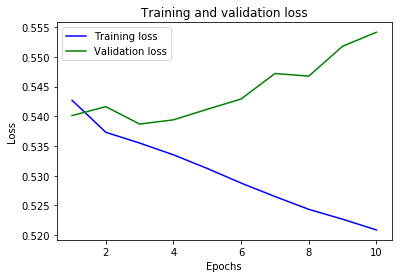

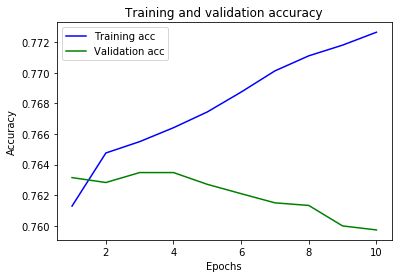

In [21]:
    
    
    batch_size=256
    epochs = 10
    vocab_size = len(t.word_index) + 1
    model = models.Sequential()
    model.add(Embedding(top_x_words, 32, input_length=(max_length)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(np.array(x_train_new),np.array(y_train_new), epochs=epochs,validation_data=(np.array(x_test_new),np.array(y_test_new)), batch_size=batch_size)
    
    history_dict = history.history
    
    
    loss_values = history_dict['loss']
    loss_values = np.array(loss_values)
    epochs = range(1, len(loss_values) + 1)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)

    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, 'b-',label='Training loss')
    plt.plot(epochs, val_loss_values,'g-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b-', label='Training acc')
    plt.plot(epochs, val_acc_values, 'g-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    

    
    

In [22]:
epochs = 3
batch_size= 256
loss,accuracy = model.evaluate(np.array(x_test_new),np.array(y_test_new))
print("loss: "+ str(loss))
print("accuracy: "+ str(accuracy))

100000/100000 [==============================] - 13s 134us/step
loss: 0.554137376613617
accuracy: 0.75973


In [23]:
y_test_new = to_categorical(y_test_new)
y_train_new = to_categorical(y_train_new)  

In [ ]:
    from keras.layers.convolutional import Conv1D

    batch_size=64
    epochs = 10
    
    model = models.Sequential()
    model.add(Embedding(top_x_words,128, input_shape= (max_length,)))
    model.add(Dropout(.20))
    model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    #model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
    #model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(2,kernel_size=1,padding='same', activation='relu' ))
    model.add(GlobalAveragePooling1D())
    model.add(Activation('softmax'))
    model.compile( optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(np.array(x_train_new),np.array(y_train_new), epochs=epochs,validation_data=(np.array(x_test_new),np.array(y_test_new)), batch_size=batch_size)
    

  

    

Train on 400000 samples, validate on 100000 samples
Epoch 1/10
123776/400000 [========>.....................] - ETA: 33:15 - loss: 0.5518 - acc: 0.7600

In [ ]:
    
    value = sum(y_test_new)
    positive = value/len(y_test_new)
    negative = 1 - positive
    print("Percent positive reviews: " + str(positive))
    print("Percent Negative reviews: " + str(negative))
    print("Finished with data")


    history_dict = history.history
    loss_values = history_dict['loss']
    loss_values = np.array(loss_values)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)

    epochs = range(1, len(loss_values) + 1)

    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, 'b-',label='Training loss')
    plt.plot(epochs, val_loss_values,'g-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b-', label='Training acc')
    plt.plot(epochs, val_acc_values, 'g-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


In [ ]:
epochs = 8
batch_size= 256
model.fit(np.array(x_train_new),np.array(y_train_new), epochs=epochs, batch_size=batch_size)
loss,accuracy = model.evaluate(np.array(x_test_new),np.array(y_test_new))
print("loss: "+ str(loss))
print("accuracy: "+ str(accuracy))

In [ ]:
'''
Embedding Conlusion:
From the results I get, the Convolution version does not do better than the rest.
And in most cases changing the kernal size, batch_size, dropout rate,  or the Convolutional 
filter size had little to no influence on the system. All the results were still between 
75-76%, which is worse than the Unigram or Bigram models. The VectorCount for Unigram does around 
82-86% accuracy, with the Keras and LR model doing the best. The Bigram does around 86-88%
accuracy.

Future Ideas:
    Explore Bigram models more. 
    Explore trigram models.
    
'''